# S03 T05: Exploració de les dades

# S04 T01: S04_T01_Visualització gràfica d'un dataset

## Nivell 1
### Exercici 1. Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

vuelos = pd.read_csv("DelayedFlights.csv")
print(vuelos.head())

   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   
3   1959.0        1925            WN  ...     3.0    10.0          0   
4   2121.0        2110            WN  ...     4.0    10.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN         

In [2]:
print(vuelos.info())   # para ver todas las variables y el tipo de datos que contienen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [3]:
vuelos["Year"]   # todos los datos son para el año 2008

0          2008
1          2008
2          2008
3          2008
4          2008
           ... 
1936753    2008
1936754    2008
1936755    2008
1936756    2008
1936757    2008
Name: Year, Length: 1936758, dtype: int64

In [4]:
vuelos.isna().sum()  # visualizamos los elementos nulos para cada variable

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [5]:
#elimino las columnas que creo que no interesan para el análisis
df = vuelos.drop(["TaxiIn", "TaxiOut","Diverted","TailNum"], axis=1)
df.shape

(1936758, 26)

In [6]:
df.isna().sum().median()

0.0

In [7]:
#elimino las filas con datos nulos que no me interesan para el análisis 
df.dropna(subset=["ArrDelay"], inplace=True)
df.isna().sum()

#No elimino los datos de los motivos de retraso de vuelos, porque quiero hacer una comparación

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
CancellationCode          0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

In [8]:
# visualizamos los estadísticos descriptivos para las variables que no hemos tratado
round(df[["Origin","Dest","Distance","ArrDelay","DepDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]].describe(), 2)

,Distance,ArrDelay,DepDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1928371.00,1928371.00,1928371.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,764.95,42.20,43.09,3.70,15.02,0.09,25.30
std,573.89,56.78,53.27,21.49,33.83,2.02,42.05
min,11.00,-109.00,6.00,0.00,0.00,0.00,0.00
25%,338.00,9.00,12.00,0.00,0.00,0.00,0.00
50%,606.00,24.00,24.00,0.00,2.00,0.00,8.00
75%,997.00,56.00,53.00,0.00,15.00,0.00,33.00
max,4962.00,2461.00,2467.00,1352.00,1357.00,392.00,1316.00


Text(0.5, 1.0, 'Distribución de retrasos en llegadas')

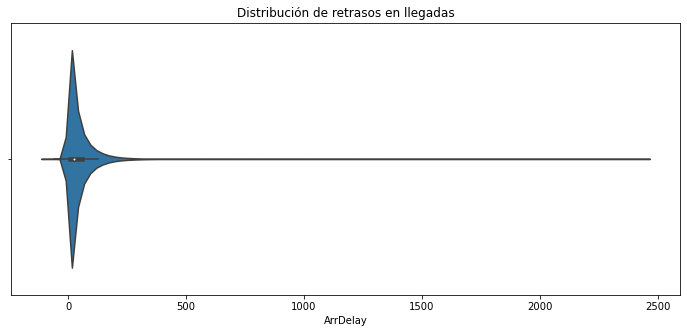

In [9]:
# Visualizamos, por ejemplo la distribución de ArrDelay
# la media de retrasos en llegadas es de solo 42,20 min., sin embargo encontramos un máx. de 2467min.
f, ax = plt.subplots(figsize=(12, 5))
sns.violinplot(data=df, x='ArrDelay')
plt.title("Distribución de retrasos en llegadas")


In [10]:
df["TotalDelay"] = df["CarrierDelay"]+df["WeatherDelay"]+df["NASDelay"]+df["SecurityDelay"]+df["LateAircraftDelay"]
    
df[["TotalDelay","ArrDelay"]]   #Comprobamos que ArrDelay es la suma de todas las variables Delay.


,TotalDelay,ArrDelay
0,NaN,-14.0
1,NaN,2.0
2,NaN,14.0
3,34.0,34.0
4,NaN,11.0
...,...,...
1936753,25.0,25.0
1936754,75.0,75.0
1936755,99.0,99.0
1936756,NaN,9.0


In [11]:
# No es necesario eliminar todas las filas de NaN en retrasos.
# Sustituimos los valores nulos NaN por 0 para que queden como válidos.

df["CarrierDelay"].fillna(0, inplace = True)
df["WeatherDelay"].fillna(0, inplace = True)
df["NASDelay"].fillna(0, inplace = True)
df["SecurityDelay"].fillna(0, inplace = True)
df["LateAircraftDelay"].fillna(0, inplace = True)
df[["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]]

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,32.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1936753,3.0,0.0,0.0,0.0,22.0
1936754,0.0,57.0,18.0,0.0,0.0
1936755,1.0,0.0,19.0,0.0,79.0
1936756,0.0,0.0,0.0,0.0,0.0


In [12]:
df.isna().sum()  # la columna TotalDelay, solo era para comprobar, la eliminaré al final.

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
CancellationCode          0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
TotalDelay           680883
dtype: int64

## Nivell 2
### - Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
### - Taula de les aerolínies amb més endarreriments acumulats
### - Quins són els vols més llargs? I els més endarrerits?


In [13]:
#creamos una nueva columna con la velocidad: distancia (de millas a km)/ tiempo (de min. a horas).

df["velocidad"] = df["Distance"]*1.6093//df["ActualElapsedTime"] * 60
df.shape

(1928371, 28)

In [14]:
round(df["velocidad"].mean(),2)   # la velocidad media de vuelo es de 477.26 km/h

477.26

In [15]:
# creamos una nueva columna de vuelos con retraso en la llegada. ArrDelay solo números positivos 
df["delay_arr"] = df["ArrDelay"]>0
df.shape

(1928371, 29)

In [16]:
df["delay_arr"]

0          False
1           True
2           True
3           True
4           True
           ...  
1936753     True
1936754     True
1936755     True
1936756     True
1936757    False
Name: delay_arr, Length: 1928371, dtype: bool

In [17]:
# los vuelos con mayor retraso en llegadas del 2008.
# El mayor retraso en llegadas es de 2461 minutos (41 horas)
df["ArrDelay"].nlargest()

322516     2461.0
686014     2453.0
839306     1951.0
1009553    1707.0
1881639    1655.0
Name: ArrDelay, dtype: float64

In [18]:
df.iloc[[322516]]
# ubicamos el vuelo con mayor retraso
# el mayor retraso en llegadas corresponde a la aerolinea NW, un 7 de febrero del 2008

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay,velocidad,delay_arr
323803,1023327,2008,2,7,4,1729.0,1719,1900.0,1850,NW,...,0,N,0.0,0.0,0.0,0.0,0.0,NaN,420.0,True


In [19]:
#insertar columna con retrasos de más de 3 horas. Tiempo en el que un pasajero puede pedir indemnización
df["delay3h"] = df["ArrDelay"] > 180
df.shape

(1928371, 30)

In [20]:
df["delay3h"].sum()  # Se han efectuado 57.713 vuelos con retrasos en las llegadas de más de 3 hrs.

57713

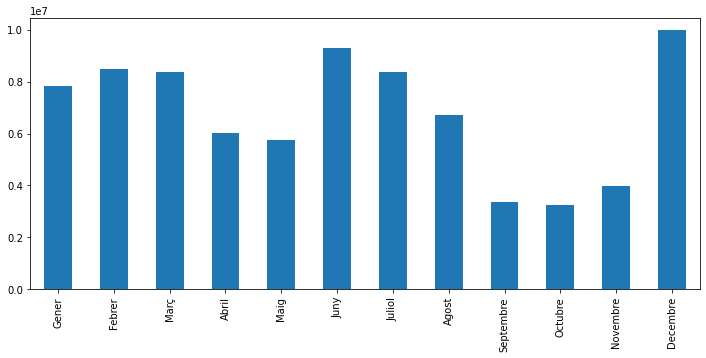

In [21]:
# agrupación por mes de los retrasos.
f, ax = plt.subplots(figsize=(12, 5))
month_delayed = df.groupby("Month")["ArrDelay"].sum()
month_delayed.index = ['Gener', 'Febrer', 'Març', 'Abril', 'Maig', 'Juny', 'Juliol', "Agost", "Septembre", "Octubre", "Novembre", "Decembre"]
month_delayed.index
month_delayed.plot(kind = "bar")   #Los meses de Junio y Diciembre tuvieron mas retrasos en llegadas (en minutos)

plt.show()

Text(0.5, 1.0, 'Aerolíneas con retrasos')

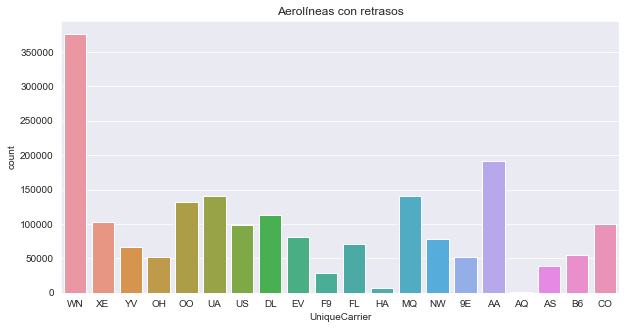

In [22]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(x='UniqueCarrier', data=df)
plt.title("Aerolíneas con retrasos")

In [24]:
# Las 10 compañías aereas con más retrasos acumulados (en minutos)
airlines_delayed = df.groupby("UniqueCarrier")["ArrDelay"].sum().sort_values(ascending=False)
airlines_delayed

UniqueCarrier
WN    11319092.0
AA     8889066.0
UA     6733013.0
MQ     6396704.0
OO     5978936.0
XE     5176042.0
DL     4535644.0
CO     4045932.0
EV     3888131.0
YV     3691461.0
US     3571867.0
NW     3462075.0
FL     3100150.0
B6     3025749.0
OH     2675993.0
9E     2420468.0
AS     1406735.0
F9      788549.0
HA      255613.0
AQ       15814.0
Name: ArrDelay, dtype: float64

<AxesSubplot:xlabel='UniqueCarrier'>

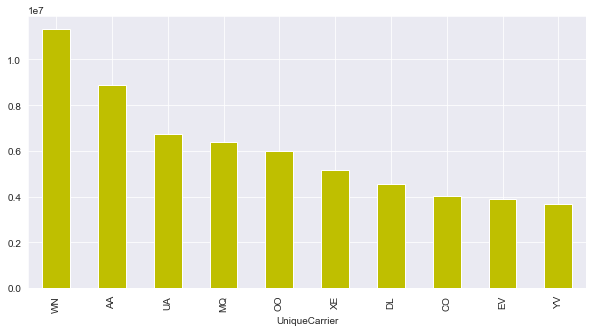

In [25]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 5))
airlines_delayed[:10].plot(kind="bar", color="y") # los 10 con más retrasos

In [26]:
# La media de retrasos de vuelos, según la compañía aérea no supera los 60 min.
meandelay_airl = round(df[["UniqueCarrier", "ArrDelay"]].groupby("UniqueCarrier").mean(),2)
meandelay_airl

,ArrDelay
UniqueCarrier,
9E,46.94
AA,46.56
AQ,21.26
AS,36.06
B6,55.09
CO,40.57
DL,39.88
EV,47.55
F9,27.94


In [27]:
# Retrasos de más de 3hrs en llegadas según compañía aérea
airlines_del3h = df.groupby("UniqueCarrier")["delay3h"].sum().sort_values(ascending=False)
airlines_del3h

UniqueCarrier
AA    6080
WN    5740
UA    5461
XE    4517
OO    3951
MQ    3913
CO    3398
YV    3353
DL    3309
B6    3262
EV    2931
FL    2373
US    2250
NW    2101
OH    1981
9E    1721
AS     882
F9     279
HA     206
AQ       5
Name: delay3h, dtype: int64

In [28]:
airlines_del3h.sum()  #57.713 vuelos con retraso en las llegadas de más de 3 horas, con derecho a inmdemnización por pasajero

57713

In [29]:
# Si la demora se prolonga más de 3 horas, tienes derecho a indemnización:
# 250€ para vuelos entre 0 y 1.500 km de distancia - A
# 400€ entre 1.500 y 3.000 km  - B
# 600€ cuando la distancia sea mayor de 3.000 km. -C

#Creo una columna de distancia en km, no en millas

df["Distance_km"] = df["Distance"]*0.621371
round(df["Distance_km"],2)

# definir condiciones
conditions = [(df["Distance_km"]<=1500),(df["Distance_km"]>1500) & (df["Distance_km"]<3000), (df["Distance_km"]>3000)]
# definir valores
values = ["A", "B", "C"]
# nueva columna asignando las condiciones y los valores
df["dist_group"] = np.select(conditions,values)
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay,velocidad,delay_arr,delay3h,Distance_km,dist_group
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,0.0,0.0,0.0,0.0,NaN,600.0,False,False,503.310510,A
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,0.0,0.0,0.0,0.0,NaN,600.0,True,False,503.310510,A
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,0.0,0.0,0.0,0.0,NaN,480.0,True,False,320.006065,A
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,0.0,0.0,0.0,32.0,34.0,540.0,True,False,320.006065,A
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,0.0,0.0,0.0,0.0,NaN,600.0,True,False,427.503248,A


In [30]:
# Cantidad de vuelos con retraso en llegadas, según las distancias de vuelo
delay_dist = df.groupby("dist_group")["delay3h"].sum()
delay_dist

dist_group
A    55727
B     1973
C       13
Name: delay3h, dtype: int64

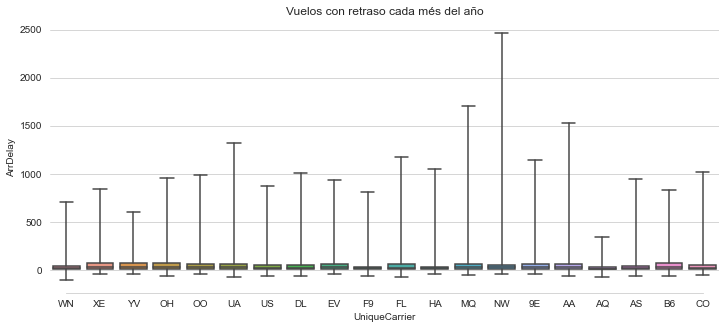

In [31]:
# total retrasos en llegadas según la compañía aerea.

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x="UniqueCarrier", y="ArrDelay", data=df,
            whis=[0, 100], width=.8)
ax.xaxis.grid(False)
ax.set(title="Vuelos con retraso cada més del año")
sns.despine(trim=True, left=True)

# los principales estadísticos descriptivos para cada compañía se ubican por debajo de los 60 vuelos.
# Sin embargo, los outliers se mueven en rangos mucho más alejados. 
# NW, MQ, AA presentan retrasos de más de 1500 min.

<AxesSubplot:title={'center':'Retrasos según compañias aéreas'}, xlabel='UniqueCarrier', ylabel='ArrDelay'>

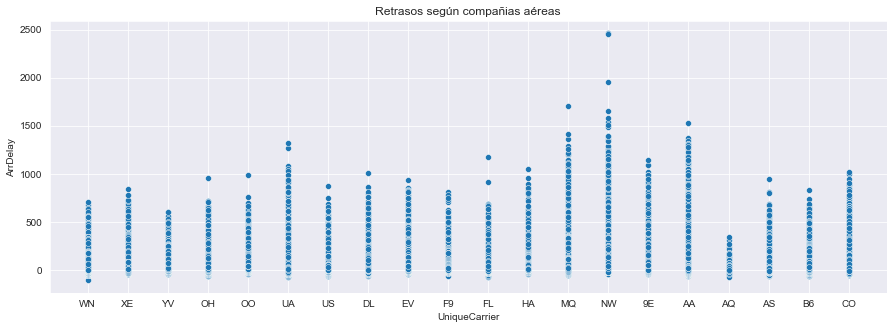

In [32]:
# Mismo gráfico pero de dispersión es menos saturado.
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15, 5))
ax.set(title="Retrasos según compañias aéreas")
sns.scatterplot(x="UniqueCarrier", y="ArrDelay", data=df,   
               )

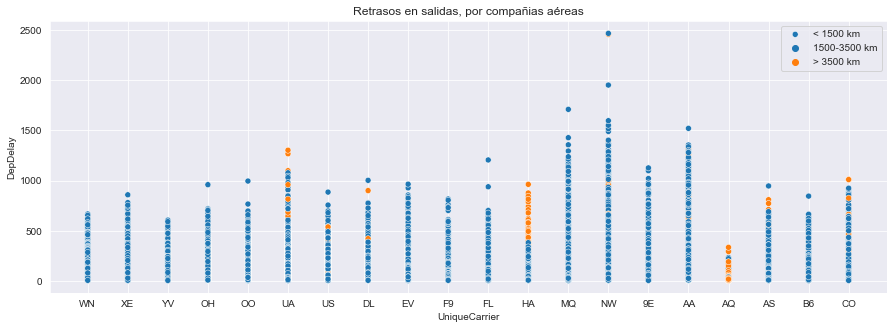

In [35]:
# total retrasos en salidas según la compañía aerea.
# Se añade la categoría "dist_group", distancias de vuelos agrupados A (<1500 km), B(1500-3500 km), C (>3500 km)
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15, 5))
ax.set(title="Retrasos en salidas, por compañias aéreas")
sns.scatterplot(x="UniqueCarrier", y="DepDelay", data=df, hue="dist_group",   
               )
plt.legend(labels=["< 1500 km ","1500-3500 km","> 3500 km"]);


In [36]:
# los 10 aeropuertos de origen con mayor retraso en las salidas (en minutos)
aerop_delay = df.groupby("Origin")["DepDelay"].sum().sort_values(ascending= False)
aerop_delay.head(10)

Origin
ORD    6324088.0
ATL    5361202.0
DFW    3639814.0
DEN    2785748.0
EWR    2658748.0
LAX    2231876.0
SFO    2139602.0
IAH    2129893.0
LAS    2073885.0
PHX    1952496.0
Name: DepDelay, dtype: float64

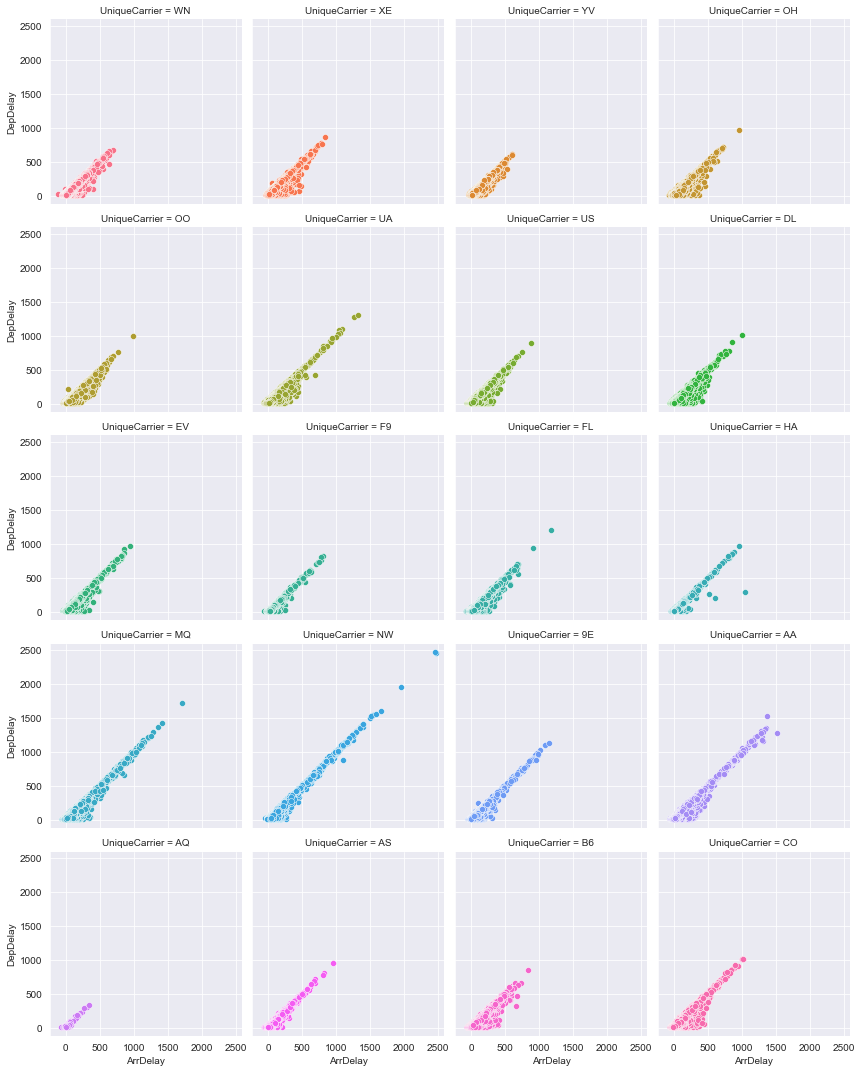

In [37]:
# Si además vemos los aeropuertos con mayor retraso en salidas y llegadas
# Las que acumulan menor retraso en tiempo y frecuencia son AQ, YV y F9.
# las que acumulan más retrasos en tiempo son MQ, MW, AA
ax = sns.FacetGrid(df, col="UniqueCarrier", hue="UniqueCarrier", col_wrap=4)
ax.map(sns.scatterplot,"ArrDelay","DepDelay")

In [38]:
# los principales motivos de retraso de vuelos(minutos)
reasons_delay = df[["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]
reasons_delay.sum().sort_values(ascending=False)

#los retrasos atribuidos a aeronaves que llegan tarde LateAircraftDelay y los retrasos atribuibles al portador CarrierDelay.

LateAircraftDelay    31557038.0
CarrierDelay         23926070.0
NASDelay             18739310.0
WeatherDelay          4620160.0
SecurityDelay          112445.0
dtype: float64

In [39]:
#las 10 ciudades de origen con retrasos por factores de seguridad (minutos) Tiene mayor concentración IAH: Houston
security_group = df.groupby("Origin")["SecurityDelay"].sum().sort_values(ascending = False)
security_group.head(10)

Origin
IAH    12553.0
PHX     5136.0
LAX     4257.0
LAS     4018.0
EWR     3899.0
IAD     3547.0
CLT     3402.0
SEA     3382.0
JFK     2893.0
SAN     2871.0
Name: SecurityDelay, dtype: float64

In [40]:
# Las 10 ciudades con retrasos por factores meteorológicos (minutos) 
security_group = df.groupby("Origin")["WeatherDelay"].sum().sort_values(ascending = False)
security_group.head(10)

Origin
ATL    427500.0
ORD    417122.0
DFW    247026.0
DTW    162312.0
JFK    160785.0
IAH    153050.0
LGA    144925.0
MSP    120342.0
EWR    120228.0
CVG    107150.0
Name: WeatherDelay, dtype: float64

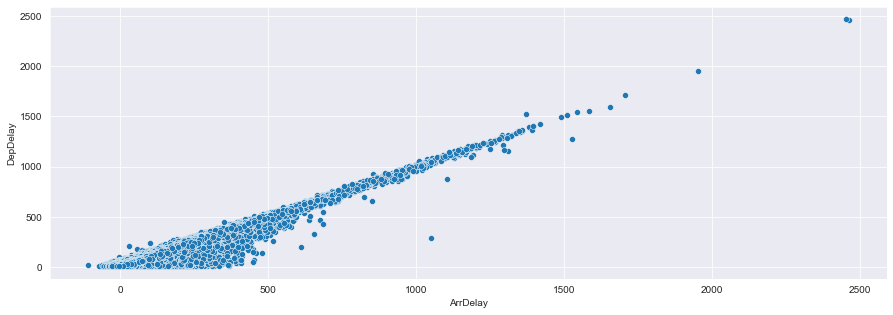

In [41]:
# la distribución de retrasos en salidas y llegadas 
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=df, x="ArrDelay", y="DepDelay");

# la distribución muestra una línea de tendencia positiva, las variables podrían tener una correlación alta y positiva.

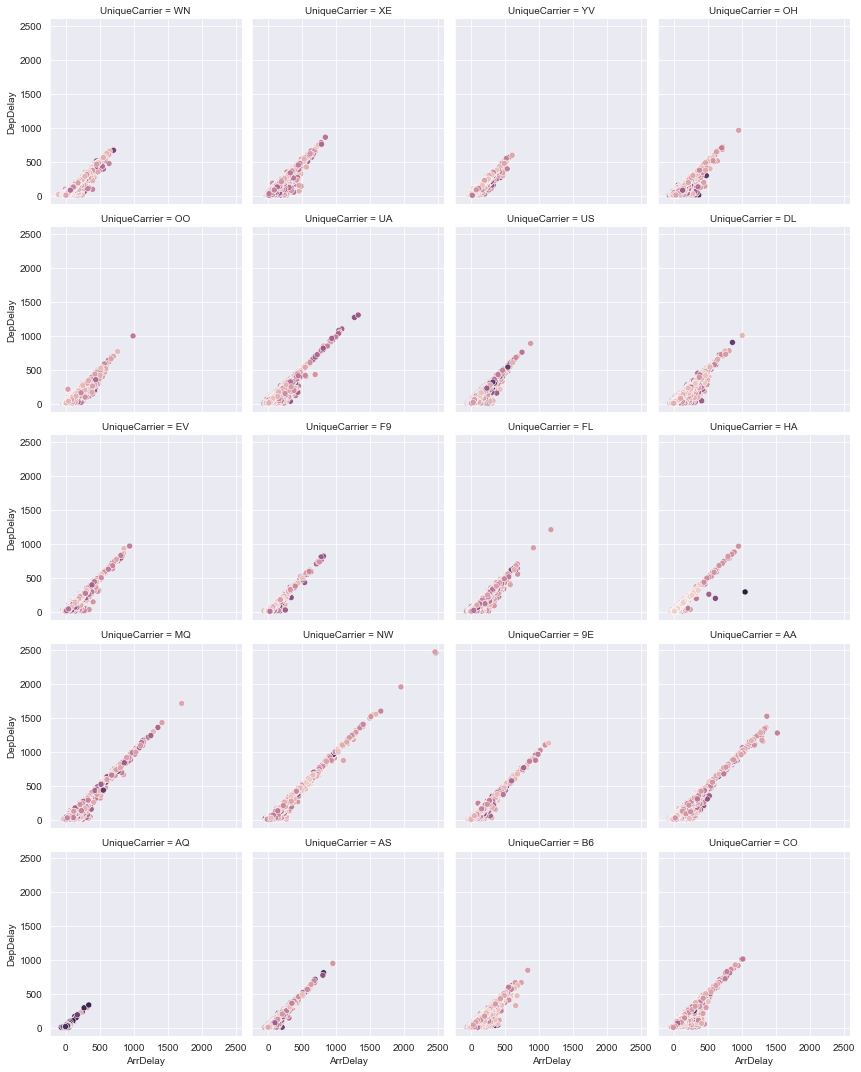

In [47]:
# la distribución de retrasos en salidas y llegadas según las aerolíneas 

ax = sns.FacetGrid(df, col="UniqueCarrier", col_wrap=4 )
              
ax.map(sns.scatterplot,"ArrDelay","DepDelay","AirTime");

#Una mayor frecuencia de casos en los meses de diciembre

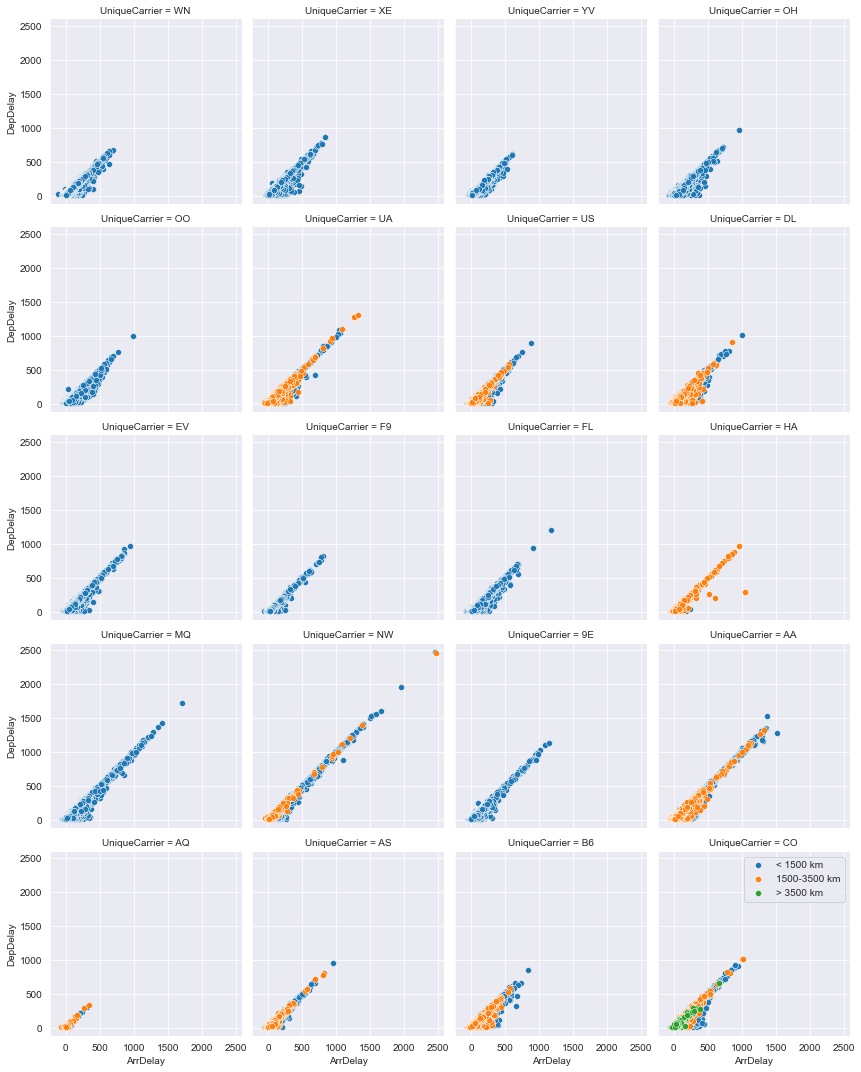

In [46]:
# Distribución de retrasos según aerolínea
# 10 aerolíneas acumulan retrasos en trayectos cortos, menos de 1500 kms.
# Otras 9 aerolíneas acumulan retrasos fundamentalmente en trayectos medios (1500-3500 km.)
# Solo la compañia CO presenta retrasos en todos los tipos de trayectos.

ax = sns.FacetGrid(df, col="UniqueCarrier", hue="dist_group", col_wrap=4 )
ax.map(sns.scatterplot,"ArrDelay","DepDelay");
plt.legend(labels=["< 1500 km ","1500-3500 km","> 3500 km"]);


In [82]:
#Volvemos a revisar los datos
df.dropna(subset=["ArrDelay"], inplace=True)
df.isna().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
CancellationCode          0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
TotalDelay           680883
velocidad                 0
delay_arr                 0
delay3h                   0
Distance_km               0
dist_group                0
dtype: int64

In [83]:
#eliminamos la columna TotalDelay que creamos para hacer una comparación
df.dropna(subset=["TotalDelay"], inplace=True)
df.isna().sum()


Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
Cancelled            0
CancellationCode     0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
TotalDelay           0
velocidad            0
delay_arr            0
delay3h              0
Distance_km          0
dist_group           0
dtype: int64

## Exporta el data set net i amb les noves columnes a Excel.

In [84]:
#exportar vuelos2 a excel
df[:5000].to_excel("DelayedVuelos2.xlsx")